In [1]:
import pandas as pd
import numpy as np
# Create a synthetic dataset
np.random.seed(42)
# Independent variables
speed_limit = np.random.randint(40, 80, 100)
weather_condition = np.random.choice(['Clear', 'Rainy', 'Snowy'], 100)
road_condition = np.random.choice(['Dry', 'Wet'], 100)
# Dependent variable (accident severity)
accident_severity = 2 * speed_limit + (weather_condition == 'Rainy') * 20 + (road_condition == 'Wet') * 15 + np.random.normal(0, 10, 100)
# Create a DataFrame
data = pd.DataFrame({
    'SpeedLimit': speed_limit,
    'WeatherCondition': weather_condition,
    'RoadCondition': road_condition,
    'AccidentSeverity': accident_severity
})
# Display the dataset
print(data.head())
# Save the dataset to a CSV file
data.to_csv('accident_dataset.csv', index=False)


   SpeedLimit WeatherCondition RoadCondition  AccidentSeverity
0          78            Snowy           Dry        165.206667
1          68            Snowy           Dry        133.732775
2          54            Rainy           Wet        149.530483
3          47            Clear           Dry        105.026875
4          60            Snowy           Dry        101.501971


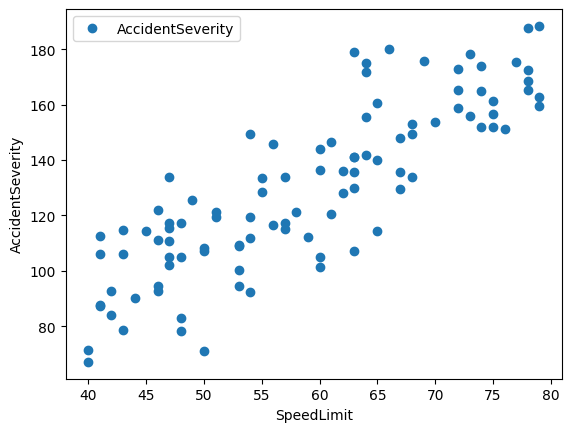

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv('/content/accident_dataset.csv')
data.plot(x='SpeedLimit',y='AccidentSeverity',style='o')
plt.xlabel('SpeedLimit')
plt.ylabel('AccidentSeverity')
plt.show()


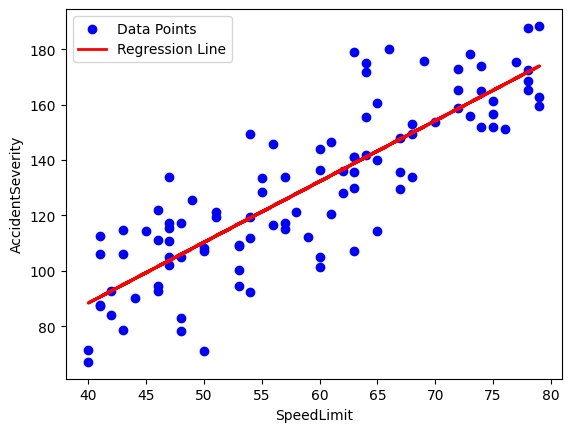

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("/content/accident_dataset.csv")

# Extract the independent variable (X) and dependent variable (y)
X = data[["SpeedLimit"]]
y = data["AccidentSeverity"]

# Create and fit a linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Plot the data points
plt.scatter(X, y, color='blue', marker='o', label='Data Points')

# Overlay the regression line
plt.plot(X, regressor.predict(X), color='red', linewidth=2, label='Regression Line')

plt.xlabel("SpeedLimit")
plt.ylabel("AccidentSeverity")
plt.legend()
plt.show()


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv("/content/accident_dataset.csv")
x=pd.DataFrame(data['SpeedLimit'])
y=pd.DataFrame(data['AccidentSeverity'])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 1)
(20, 1)
(80, 1)
(20, 1)


In [10]:
print(regressor.intercept_)


0.6236451002797878


In [7]:
print(regressor.coef_)


[2.19311687]


In [11]:
y_pred=regressor.predict(x_test)
y_pred

array([105.89325472, 138.79000773, 132.21065712, 138.79000773,
       147.56247519, 138.79000773, 125.63130652,  88.34831978,
       132.21065712, 103.70013785, 171.68676073, 116.85883905,
       149.75559206,  94.92767038, 173.8798776 , 101.50702099,
       167.300527  , 147.56247519, 140.98312459, 138.79000773])

In [12]:
#y_test
#print(y_test)
y_test.head(10)

,AccidentSeverity
80,82.920857
84,178.812911
33,143.967743
81,141.094005
93,129.370746
17,107.134720
36,117.272234
82,71.424511
69,136.409074
65,134.003481


In [13]:
from sklearn import metrics
import numpy as np
# Assuming y_test  and y_pred are Numpy arrays or pandas series
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)#rmse is the squareroot of mse

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 14.121218044060948
Mean Squared Error (MSE): 318.21456070246893
Root Mean Squared Error (RMSE): 17.838569469059703


In [14]:
import joblib
import pickle
from sklearn.linear_model import LinearRegression

# Train your linear regression model
model = LinearRegression()
model.fit(x_train,y_train)  # Replace x and y with your training data

# Save the trained model to a file using joblib
joblib.dump(model, 'linear_regression_model.pkl')

# Alternatively, you can save the model using pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [15]:
import joblib
import pandas as pd
import numpy as np

# Load the saved model
model = joblib.load('linear_regression_model.pkl')

# Assuming you have a new or test dataset
new_x = np.array([6, 7, 8, 9, 10]).reshape(-1, 1)

# Make predictions using the loaded model
predictions = model.predict(new_x)
#create a DataFrame with one dimensional array
new_data=pd.DataFrame({'x':new_x.flatten(),'predict_Y':predictions.flatten()})

print(new_data)


    x  predict_Y
0   6   9.895638
1   7  12.158836
2   8  14.422034
3   9  16.685232
4  10  18.948430


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
